<a href="https://colab.research.google.com/github/tomepm/Reconocimiento-de-Patrones-y-Aprendizaje-de-Maquina/blob/main/Ejercicio02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio N° 2**
### **Presentado por:** *Pablo Tomé*
**Ejercicio 2:** Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).

Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).

Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

In [172]:
# Importo librerias para trabajar
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
# Semilla aletoria
np.random.seed(1)

# Generación de los Datasets:

## Dataset A: Media = 100 - Desvación Standard = 10
x = random.normal(loc=100, scale=10, size=50)
df_x = pd.DataFrame([x])
df_x = df_x.transpose()
df_x = df_x.assign(Etiqueta = 0)
df_x.columns = ['Valor', 'Etiqueta']

## Dataset B: Media = 110 - Desvación Standard = 12
y = random.normal(loc=110, scale=12, size=50)
df_y = pd.DataFrame([y])
df_y = df_y.transpose()
df_y = df_y.assign(Etiqueta = 1)
df_y.columns = ['Valor', 'Etiqueta']

df_xy = pd.concat([df_x, df_y])
df_xy.head()

#df_xy = pd.DataFrame(x, columns=['Etiqueta'])
df_xy.head()

,Valor,Etiqueta
0,116.243454,0
1,93.882436,0
2,94.718282,0
3,89.270314,0
4,108.654076,0


**Grafico del Dataframe**

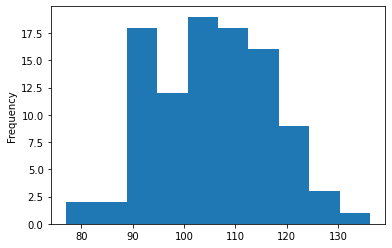

In [174]:
# Dataframe
df_xy['Valor'].plot.hist()

**Ordeno el Dataset**

In [175]:
df_xy.sort_values(['Valor'], ignore_index=True, inplace=True)
df_xy

,Valor,Etiqueta
0,76.984613,0
1,79.398593,0
2,85.733585,1
3,88.826897,0
4,88.993808,0
...,...,...
95,123.579553,1
96,124.387015,1
97,125.034418,1
98,128.237802,1


**Definicion y Grafico ROC**

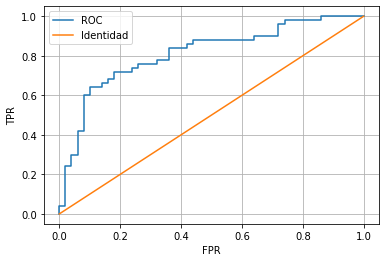

In [176]:
#Gráfica de la curva ROC
x_list, y_list = ([], [])
x_list.append(0)
y_list.append(0)

x, y = (0, 0)

for i in range(100):
    if df_xy.iloc[i, 1] == 0:
        y += 1/50
    else:
        x += 1/50
    x_list.append(x)
    y_list.append(y)


plt.figure()
plt.plot(x_list, y_list, [0,1], [0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend(['ROC', 'Identidad'])

**Dataset con predicciones**

In [177]:
df_xy=df_xy.assign(Prediccion = 0)
dist = np.sqrt(np.abs(np.array(x_list)-((np.array(x_list)+np.array(y_list))/2))+np.abs(np.array(y_list)-((np.array(x_list)+np.array(y_list))/2)))
[pos_umbral] =np.where(dist == dist.max())
pos_umbral = pos_umbral[-1] 


Umbral = df_xy.iloc[pos_umbral,0]


df_xy['Prediccion'] = [0 if df_xy.iloc[i,0] < Umbral else 1 for i in range(100)]
df_xy

,Valor,Etiqueta,Prediccion
0,76.984613,0,0
1,79.398593,0,0
2,85.733585,1,0
3,88.826897,0,0
4,88.993808,0,0
...,...,...,...
95,123.579553,1,1
96,124.387015,1,1
97,125.034418,1,1
98,128.237802,1,1


In [178]:
df_pred = df_xy.copy()
df_pred['Etiqueta'] = [0 if x <= Umbral else 1 for x in df_xy['Valor']]

df_xy_pred = pd.DataFrame({'Valor': df_xy["Valor"].values, 'Etiqueta': df_xy["Etiqueta"].values, 'Predición': df_pred["Etiqueta"].values})

df_xy_pred

,Valor,Etiqueta,Predición
0,76.984613,0,0
1,79.398593,0,0
2,85.733585,1,0
3,88.826897,0,0
4,88.993808,0,0
...,...,...,...
95,123.579553,1,1
96,124.387015,1,1
97,125.034418,1,1
98,128.237802,1,1


**Dataset con los Tipos de Error**

In [179]:
df_xy_pred['Condicion_Predición'] =  ['Falso_Positivo'     if df_xy_pred.iloc[i,1]==0 and df_xy_pred.iloc[i,2]==1 else 
                                      'Falso_Negativo'     if df_xy_pred.iloc[i,1]==1 and df_xy_pred.iloc[i,2]==0 else 
                                      'Verdadero_Negativo' if df_xy_pred.iloc[i,1]==0 and df_xy_pred.iloc[i,2]==0 else
                                      'Verdadero_Positivo' for i in range(100)]
df_xy_pred.sample(10)

,Valor,Etiqueta,Predición,Condicion_Predición
95,123.579553,1,1,Verdadero_Positivo
67,111.920445,1,1,Verdadero_Positivo
96,124.387015,1,1,Verdadero_Positivo
71,112.761137,1,1,Verdadero_Positivo
1,79.398593,0,0,Verdadero_Negativo
80,116.155158,1,1,Verdadero_Positivo
99,136.226905,1,1,Verdadero_Positivo
45,105.496581,1,0,Falso_Negativo
52,106.422886,1,1,Verdadero_Positivo
27,97.506296,0,0,Verdadero_Negativo


**Parametros de calidad**

In [180]:
FP, FN, VN, VP = [np.sum(df_xy_pred['Condicion_Predición'] == TdE) for TdE in ['Falso_Positivo', 'Falso_Negativo', 'Verdadero_Negativo', 'Verdadero_Positivo']]

print('Falso_Positivo          :', FP)
print('Falso_Negativo          :', FN)
print('Verdadero_Positivo      :', VP)
print('Verdadero_Negativo      :', VN)

TPR = VP / (VP + FN)
FPR = FP / (FP + VN)
PPV = VP / (VP + FP)  
f_score = (2 * TPR * PPV) / (TPR + PPV)

print('------------------------------')
print('Recall                  :', TPR)
print('Tasa de Falsos Positivos:', FPR)
print('Precision               :', PPV)  
print('F-score                 :', f_score)

Falso_Positivo          : 14
Falso_Negativo          : 10
Verdadero_Positivo      : 40
Verdadero_Negativo      : 36
------------------------------
Recall                  : 0.8
Tasa de Falsos Positivos: 0.28
Precision               : 0.7407407407407407
F-score                 : 0.7692307692307692


**Conclusiones:**

Se trataron 2 combinaciones de medias con los siguientes resultados:


**La media de las A fue de 100 y la media de las B de 120.**

Los resultados obtenidos:

*   Falso_Positivo          : 6
*   Falso_Negativo          : 6
*   Verdadero_Positivo      : 44
*   Verdadero_Negativo      : 44
*   Recall                  : 0.88
*   Tasa de Falsos Positivos: 0.12
*   Precision               : 0.88
*   F-score                 : 0.88


**La media de las A fue de 100 y la media de las B de 110.**

Los resultados obtenidos:

*   Falso_Positivo          : 14
*   Falso_Negativo          : 10
*   Verdadero_Positivo      : 40
*   Verdadero_Negativo      : 36
*   Recall                  : 0.8
*   Tasa de Falsos Positivos: 0.28
*   Precision               : 0.7407407407407407
*   F-score                 : 0.7692307692307692

***A medida que las medias se aproximan la prediccion se hace menos precisa debido a proximidad de los valores.***